In [61]:
# Import the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, shape
from geopandas import GeoDataFrame
import json
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import matplotlib.ticker as ticker

In [10]:
# Load in the dataframe.
pd.set_option('display.max_columns', None)
df = pd.read_csv('Fire Incidents Data.csv')
df.head()

/var/folders/pf/dhzh4m9j6tq7w7_1qw2v6c580000gn/T/ipykernel_19426/2485598782.py:3: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Fire Incidents Data.csv')


,_id,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Exposures,Ext_agent_app_or_defer_time,Extent_Of_Fire,Final_Incident_Type,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Number,Incident_Station_Area,Incident_Ward,Initial_CAD_Event_Type,Intersection,Last_TFS_Unit_Clear_Time,Latitude,Level_Of_Origin,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Number_of_responding_apparatus,Number_of_responding_personnel,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties
0,2828441,81 - Engine Area,NaN,NaN,0.0,0.0,15000.0,NaN,NaN,2018-02-24T21:12:00,NaN,01 - Fire,NaN,NaN,NaN,2018-02-24T21:15:40,999 - Undetermined,F18020956,441,1.0,Vehicle Fire,Dixon Rd / 427 N Dixon Ramp,2018-02-24T21:38:31,43.686558,NaN,-79.599419,47 - Vehicle,1 - Extinguished by fire department,1.0,4.0,99 - Undetermined,"896 - Sidewalk, street, roadway, highway, hwy ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"7 - Fully involved (total structure, vehicle, ...",2018-02-24T21:04:29,2018-02-24T21:10:11,0.0
1,2828442,"75 - Trash, rubbish area (outside)",NaN,NaN,0.0,0.0,50.0,NaN,NaN,2018-02-24T21:29:42,NaN,01 - Fire,NaN,NaN,NaN,2018-02-24T21:32:24,999 - Undetermined,F18020969,116,18.0,Fire - Grass/Rubbish,Sheppard Ave E / Clairtrell Rd,2018-02-24T21:35:58,43.766135,NaN,-79.390039,97 - Other,1 - Extinguished by fire department,1.0,4.0,03 - Suspected Vandalism,"896 - Sidewalk, street, roadway, highway, hwy ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 - Fire with no evidence from street,2018-02-24T21:24:43,2018-02-24T21:29:31,0.0
2,2828443,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,"03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vand...",NaN,NaN,NaN,NaN,NaN,F18021182,221,21.0,Fire - Highrise Residential,Danforth Rd / Savarin St,2018-02-25T14:14:03,43.743230,NaN,-79.245061,NaN,NaN,6.0,22.0,NaN,891 - Outdoor general auto parking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-25T13:29:59,2018-02-25T13:36:49,0.0
3,2828444,"75 - Trash, rubbish area (outside)",01 - Normal (no change),1 - No business interruption,0.0,0.0,0.0,0.0,NaN,2018-02-25T14:19:25,1 - Confined to object of origin,01 - Fire,9 - Undetermined,8 - Not applicable (no system),9 - Undetermined,2018-02-25T14:20:00,999 - Undetermined,F18021192,133,5.0,Fire - Commercial/Industrial,Keele St / Lawrence Ave W,2018-02-25T15:07:42,43.708659,999,-79.478062,99 - Undetermined (formerly 98),1 - Extinguished by fire department,6.0,22.0,99 - Undetermined,511 - Department Store,9 - Floor/suite of fire origin: Smoke alarm pr...,98 - Not applicable: Alarm operated OR presenc...,9 - Type undetermined,"8 - Not applicable: No alarm, no persons present",99 - Undetermined,8 - Not applicable - no sprinkler system present,9 - Undetermined,3 - Fire with smoke showing only - including v...,2018-02-25T14:13:39,2018-02-25T14:18:07,0.0
4,2828445,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,"03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vand...",NaN,NaN,NaN,NaN,NaN,F18021271,132,8.0,Fire - Residential,Replin Rd / Tapestry Lane,2018-02-25T18:34:24,43.718118,NaN,-79.443184,NaN,NaN,6.0,22.0,NaN,860 - Lawn around structure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-25T18:20:43,2018-02-25T18:26:19,0.0


In [5]:
# Check for missing values in the dataframe.
na_report = df.isna().sum()
print(na_report)

_id                                                                  0
Area_of_Origin                                                    7422
Building_Status                                                  13795
Business_Impact                                                  13797
Civilian_Casualties                                               3707
Count_of_Persons_Rescued                                           223
Estimated_Dollar_Loss                                             7398
Estimated_Number_Of_Persons_Displaced                            13796
Exposures                                                        25418
Ext_agent_app_or_defer_time                                       7427
Extent_Of_Fire                                                   13797
Final_Incident_Type                                                  0
Fire_Alarm_System_Impact_on_Evacuation                           13797
Fire_Alarm_System_Operation                                      13797
Fire_A

In [8]:
# Filter the dataframe to include only rows where Estimated_Dollar_Loss is greater than 0.
df_filtered = df[df['Estimated_Dollar_Loss'] > 0]
df_filtered

,_id,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Exposures,Ext_agent_app_or_defer_time,Extent_Of_Fire,Final_Incident_Type,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Number,Incident_Station_Area,Incident_Ward,Initial_CAD_Event_Type,Intersection,Last_TFS_Unit_Clear_Time,Latitude,Level_Of_Origin,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Number_of_responding_apparatus,Number_of_responding_personnel,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties
0,2828441,81 - Engine Area,NaN,NaN,0.0,0.0,15000.0,NaN,NaN,2018-02-24T21:12:00,NaN,01 - Fire,NaN,NaN,NaN,2018-02-24T21:15:40,999 - Undetermined,F18020956,441,1.0,Vehicle Fire,Dixon Rd / 427 N Dixon Ramp,2018-02-24T21:38:31,43.686558,NaN,-79.599419,47 - Vehicle,1 - Extinguished by fire department,1.0,4.0,99 - Undetermined,"896 - Sidewalk, street, roadway, highway, hwy ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"7 - Fully involved (total structure, vehicle, ...",2018-02-24T21:04:29,2018-02-24T21:10:11,0.0
1,2828442,"75 - Trash, rubbish area (outside)",NaN,NaN,0.0,0.0,50.0,NaN,NaN,2018-02-24T21:29:42,NaN,01 - Fire,NaN,NaN,NaN,2018-02-24T21:32:24,999 - Undetermined,F18020969,116,18.0,Fire - Grass/Rubbish,Sheppard Ave E / Clairtrell Rd,2018-02-24T21:35:58,43.766135,NaN,-79.390039,97 - Other,1 - Extinguished by fire department,1.0,4.0,03 - Suspected Vandalism,"896 - Sidewalk, street, roadway, highway, hwy ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 - Fire with no evidence from street,2018-02-24T21:24:43,2018-02-24T21:29:31,0.0
5,2828446,81 - Engine Area,NaN,NaN,0.0,0.0,1500.0,NaN,NaN,2018-02-25T18:38:00,NaN,01 - Fire,NaN,NaN,NaN,2018-02-25T18:40:00,999 - Undetermined,F18021274,215,25.0,Vehicle Fire,Lawrence Ave E / Beechgrove Dr,2018-02-25T19:08:28,43.773787,NaN,-79.162282,47 - Vehicle,1 - Extinguished by fire department,7.0,25.0,99 - Undetermined,837 - Vehicles or Vehicle Parts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 - Flames showing from small area (one storey...,2018-02-25T18:31:19,2018-02-25T18:35:17,0.0
6,2828447,22 - Sleeping Area or Bedroom (inc. patients r...,01 - Normal (no change),1 - No business interruption,0.0,0.0,2000.0,0.0,NaN,2018-02-26T18:28:00,2 - Confined to part of room/area of origin,01 - Fire,"8 - Not applicable: No fire alarm system, no p...",8 - Not applicable (no system),8 - Not applicable (bldg not classified by OBC...,2018-02-26T18:30:00,"51 - Incandescent Lamp - Light Bulb, Spotlight",F18021633,235,19.0,Fire - Residential,Westview Blvd / Holland Ave,2018-02-26T19:05:58,43.714811,002,-79.304107,16 - Insulation,1 - Extinguished by fire department,6.0,22.0,20 - Design/Construction/Installation/Maintena...,301 - Detached Dwelling,1 - Floor/suite of fire origin: No smoke alarm,98 - Not applicable: Alarm operated OR presenc...,8 - Not applicable - no smoke alarm or presenc...,7 - Not applicable: Occupant(s) first alerted ...,2 - Confined to part of room/area of origin,8 - Not applicable - no sprinkler system present,3 - No sprinkler system,2 - Fire with no evidence from street,2018-02-26T18:18:55,2018-02-26T18:24:47,0.0
7,2828448,55 - Mechanical/Electrical Services Room,01 - Normal (no change),2 - May resume operations within a week,0.0,0.0,100000.0,0.0,NaN,2018-02-27T10:57:32,2 - Confined to part of room/area of origin,01 - Fire,2 - Some persons (at risk) evacuated as a resu...,1 - Fire alarm system operated,1 - Fire alarm system present,2018-02-27T11:36:09,23 - Distribution Equipment (includes panel bo...,F18021837,231,24.0,Alarm Highrise Residential,Peking Rd / Nelson St,2018-02-27T13:51:

In [18]:
# Check for missing values again in the filtered dataframe.
na_report2 = df_filtered.isna().sum()
print(na_report2)

_id                                                                  0
Area_of_Origin                                                       1
Building_Status                                                   5529
Business_Impact                                                   5530
Civilian_Casualties                                               1640
Count_of_Persons_Rescued                                             1
Estimated_Dollar_Loss                                                0
Estimated_Number_Of_Persons_Displaced                             5530
Exposures                                                        17049
Ext_agent_app_or_defer_time                                          2
Extent_Of_Fire                                                    5530
Final_Incident_Type                                                  0
Fire_Alarm_System_Impact_on_Evacuation                            5530
Fire_Alarm_System_Operation                                       5530
Fire_A

In [17]:
# Drop the columns that we aren't interested in.
columns_to_drop = [
    '_id', 'Exposures', 'Ext_agent_app_or_defer_time', 'Extent_Of_Fire', 
    'Final_Incident_Type', 'Fire_Alarm_System_Impact_on_Evacuation', 'Incident_Number', 
    'Incident_Ward', 'Initial_CAD_Event_Type', 'Intersection', 
    'Last_TFS_Unit_Clear_Time', 'Number_of_responding_apparatus', 
    'Number_of_responding_personnel', 'Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation'
]

df_filtered_cleaned = df_filtered.drop(columns=columns_to_drop)
df_filtered_cleaned.head()

,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Station_Area,Latitude,Level_Of_Origin,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties
0,81 - Engine Area,NaN,NaN,0.0,0.0,15000.0,NaN,NaN,NaN,2018-02-24T21:15:40,999 - Undetermined,441,43.686558,NaN,-79.599419,47 - Vehicle,1 - Extinguished by fire department,99 - Undetermined,"896 - Sidewalk, street, roadway, highway, hwy ...",NaN,NaN,NaN,NaN,NaN,NaN,"7 - Fully involved (total structure, vehicle, ...",2018-02-24T21:04:29,2018-02-24T21:10:11,0.0
1,"75 - Trash, rubbish area (outside)",NaN,NaN,0.0,0.0,50.0,NaN,NaN,NaN,2018-02-24T21:32:24,999 - Undetermined,116,43.766135,NaN,-79.390039,97 - Other,1 - Extinguished by fire department,03 - Suspected Vandalism,"896 - Sidewalk, street, roadway, highway, hwy ...",NaN,NaN,NaN,NaN,NaN,NaN,2 - Fire with no evidence from street,2018-02-24T21:24:43,2018-02-24T21:29:31,0.0
5,81 - Engine Area,NaN,NaN,0.0,0.0,1500.0,NaN,NaN,NaN,2018-02-25T18:40:00,999 - Undetermined,215,43.773787,NaN,-79.162282,47 - Vehicle,1 - Extinguished by fire department,99 - Undetermined,837 - Vehicles or Vehicle Parts,NaN,NaN,NaN,NaN,NaN,NaN,4 - Flames showing from small area (one storey...,2018-02-25T18:31:19,2018-02-25T18:35:17,0.0
6,22 - Sleeping Area or Bedroom (inc. patients r...,01 - Normal (no change),1 - No business interruption,0.0,0.0,2000.0,0.0,8 - Not applicable (no system),8 - Not applicable (bldg not classified by OBC...,2018-02-26T18:30:00,"51 - Incandescent Lamp - Light Bulb, Spotlight",235,43.714811,002,-79.304107,16 - Insulation,1 - Extinguished by fire department,20 - Design/Construction/Installation/Maintena...,301 - Detached Dwelling,1 - Floor/suite of fire origin: No smoke alarm,98 - Not applicable: Alarm operated OR presenc...,8 - Not applicable - no smoke alarm or presenc...,2 - Confined to part of room/area of origin,8 - Not applicable - no sprinkler system present,3 - No sprinkler system,2 - Fire with no evidence from street,2018-02-26T18:18:55,2018-02-26T18:24:47,0.0
7,55 - Mechanical/Electrical Services Room,01 - Normal (no change),2 - May resume operations within a week,0.0,0.0,100000.0,0.0,1 - Fire alarm system operated,1 - Fire alarm system present,2018-02-27T11:36:09,23 - Distribution Equipment (includes panel bo...,231,43.748582,011,-79.222367,43 - Electrical Wiring Insulation,1 - Extinguished by fire department,52 - Electrical Failure,323 - Multi-Unit Dwelling - Over 12 Units,9 - Floor/suite of fire origin: Smoke alarm pr...,98 - Not applicable: Alarm operated OR presenc...,8 - Not applicable - no smoke alarm or presenc...,"7 - Spread to other floors, confined to building",8 - Not applicable - no sprinkler system present,3 - No sprinkler system,2 - Fire with no evidence from street,2018-02-27T10:28:12,2018-02-27T10:35:13,0.0


In [26]:
# Fill NaN values with 'Unknown' for the specified columns.
columns_to_fill_unknown = [
    'Building_Status', 'Business_Impact', 'Civilian_Casualties', 'Estimated_Number_Of_Persons_Displaced',
    'Fire_Alarm_System_Operation', 'Fire_Alarm_System_Presence', 'Level_Of_Origin', 'Smoke_Alarm_at_Fire_Origin',
    'Smoke_Alarm_at_Fire_Origin_Alarm_Failure', 'Smoke_Alarm_at_Fire_Origin_Alarm_Type', 'Smoke_Spread',
    'Sprinkler_System_Operation', 'Sprinkler_System_Presence'
]

df_filtered_cleaned[columns_to_fill_unknown] = df_filtered_cleaned[columns_to_fill_unknown].fillna('Unknown')

In [30]:
# Verify.
df_filtered_cleaned.head()

,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Incident_Station_Area,Latitude,Level_Of_Origin,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties
0,81 - Engine Area,Unknown,Unknown,0.0,0.0,15000.0,Unknown,Unknown,Unknown,2018-02-24T21:15:40,999 - Undetermined,441,43.686558,Unknown,-79.599419,47 - Vehicle,1 - Extinguished by fire department,99 - Undetermined,"896 - Sidewalk, street, roadway, highway, hwy ...",Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,"7 - Fully involved (total structure, vehicle, ...",2018-02-24T21:04:29,2018-02-24T21:10:11,0.0
1,"75 - Trash, rubbish area (outside)",Unknown,Unknown,0.0,0.0,50.0,Unknown,Unknown,Unknown,2018-02-24T21:32:24,999 - Undetermined,116,43.766135,Unknown,-79.390039,97 - Other,1 - Extinguished by fire department,03 - Suspected Vandalism,"896 - Sidewalk, street, roadway, highway, hwy ...",Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,2 - Fire with no evidence from street,2018-02-24T21:24:43,2018-02-24T21:29:31,0.0
5,81 - Engine Area,Unknown,Unknown,0.0,0.0,1500.0,Unknown,Unknown,Unknown,2018-02-25T18:40:00,999 - Undetermined,215,43.773787,Unknown,-79.162282,47 - Vehicle,1 - Extinguished by fire department,99 - Undetermined,837 - Vehicles or Vehicle Parts,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,4 - Flames showing from small area (one storey...,2018-02-25T18:31:19,2018-02-25T18:35:17,0.0
6,22 - Sleeping Area or Bedroom (inc. patients r...,01 - Normal (no change),1 - No business interruption,0.0,0.0,2000.0,0.0,8 - Not applicable (no system),8 - Not applicable (bldg not classified by OBC...,2018-02-26T18:30:00,"51 - Incandescent Lamp - Light Bulb, Spotlight",235,43.714811,002,-79.304107,16 - Insulation,1 - Extinguished by fire department,20 - Design/Construction/Installation/Maintena...,301 - Detached Dwelling,1 - Floor/suite of fire origin: No smoke alarm,98 - Not applicable: Alarm operated OR presenc...,8 - Not applicable - no smoke alarm or presenc...,2 - Confined to part of room/area of origin,8 - Not applicable - no sprinkler system present,3 - No sprinkler system,2 - Fire with no evidence from street,2018-02-26T18:18:55,2018-02-26T18:24:47,0.0
7,55 - Mechanical/Electrical Services Room,01 - Normal (no change),2 - May resume operations within a week,0.0,0.0,100000.0,0.0,1 - Fire alarm system operated,1 - Fire alarm system present,2018-02-27T11:36:09,23 - Distribution Equipment (includes panel bo...,231,43.748582,011,-79.222367,43 - Electrical Wiring Insulation,1 - Extinguished by fire department,52 - Electrical Failure,323 - Multi-Unit Dwelling - Over 12 Units,9 - Floor/suite of fire origin: Smoke alarm pr...,98 - Not applicable: Alarm operated OR presenc...,8 - Not applicable - no smoke alarm or presenc...,"7 - Spread to other floors, confined to building",8 - Not applicable - no sprinkler system present,3 - No sprinkler system,2 - Fire with no evidence from street,2018-02-27T10:28:12,2018-02-27T10:35:13,0.0


In [35]:
# Convert Latitude and Longitude to a geometry column for geospatial analysis.
gdf = gpd.GeoDataFrame(
    df_filtered_cleaned,
    geometry=gpd.points_from_xy(df_filtered_cleaned.Longitude, df_filtered_cleaned.Latitude),
    crs="EPSG:4326" 
)

In [37]:
# Load the run area file.
run_areas = gpd.read_file('FIRE_RUN_AREA_WGS84 copy.geojson')

In [48]:
# Filter out rows with NaN values in latitude or longitude.
gdf = gdf.dropna(subset=['Latitude', 'Longitude'])

In [53]:
# Perform a spatial join to merge the incident points with the run areas.
gdf = gpd.sjoin(gdf, run_areas, how='left', op='within')

/opt/miniconda3/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [54]:
# Calculate the total estimated dollar loss for each run area.
loss_by_area = gdf.groupby('index_right')['Estimated_Dollar_Loss'].sum().reset_index()

In [55]:
# Merge the loss data with the run areas GeoDataFrame.
run_areas = run_areas.merge(loss_by_area, left_index=True, right_on='index_right')

/var/folders/pf/dhzh4m9j6tq7w7_1qw2v6c580000gn/T/ipykernel_19426/4013047962.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


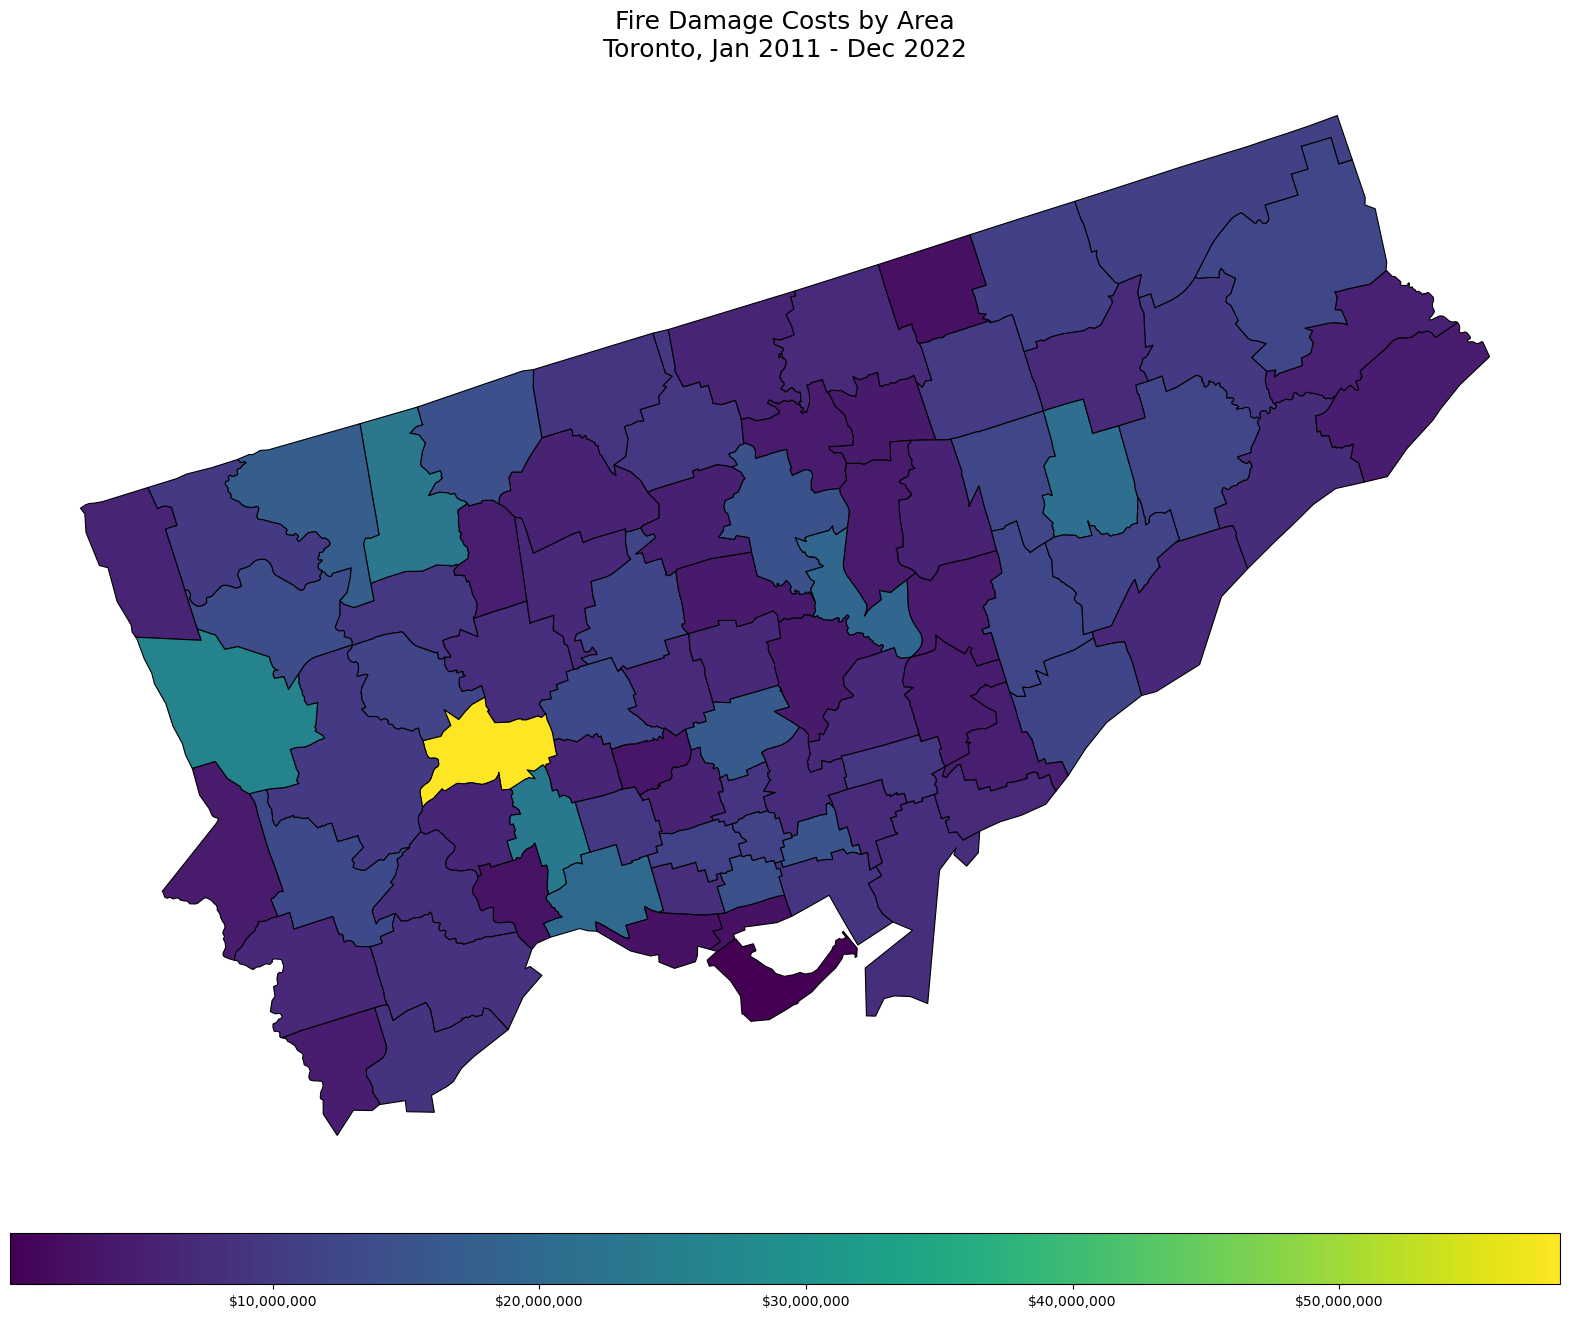

In [78]:
# Plot the map.
fig, ax = plt.subplots(figsize=(20, 20))
norm = Normalize(vmin=run_areas['Estimated_Dollar_Loss'].min(), vmax=run_areas['Estimated_Dollar_Loss'].max())
cmap = cm.get_cmap('viridis')
run_areas.plot(ax=ax, column='Estimated_Dollar_Loss', cmap='viridis', linewidth=0.8, edgecolor='k', legend=False, norm=norm)

# Add and format color bar.
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.03, aspect=30).ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Final touches.
title_text = 'Fire Damage Costs by Area\nToronto, Jan 2011 - Dec 2022'
ax.set_title(title_text, fontsize=18)
ax.set_axis_off()
plt.show()